In [13]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.decomposition import PCA

img_dir = 'train'
mask_dir = 'train/masks'
excel_file = 'train/classif.xlsx'
data_feature_file = 'data_features.csv'

# Load classification file
def load_classification(excel_file):
    if os.path.exists(excel_file):
        return pd.read_excel(excel_file)
    else:
        print(f"Excel file {excel_file} not found.")
        return None

# Load features
def load_features(data_feature_file):
    if os.path.exists(data_feature_file):
        return pd.read_csv(data_feature_file)
    else:
        print(f"Feature file {data_feature_file} not found.")
        return None

classif_df = load_classification(excel_file)
filtered_indices = classif_df[classif_df['bug_type'].str.contains('&')].index
classif_df = classif_df[~classif_df['bug_type'].str.contains('&')]

features_df = load_features(data_feature_file)
features_df = features_df.drop(filtered_indices[0], axis=0)


# 处理标签
def process_labels(df):
    bug_types = []
    species = []
    
    for _, row in df.iterrows():
        bugs = row['bug_type']
        species_info = row['species']
        
        # 处理x2
        if ' x2' in species_info:
            bugs = [bugs.replace(' x2','')] * 2
            species_info = [species_info.replace(' x2','')] * 2
        else:
            bugs = bugs.split(' & ')
            species_info = species_info.split(' & ')
        
        # 处理问号
        bugs = [bug.replace(' ?', '') for bug in bugs]
        species_info = [specie.replace(' ?', '') for specie in species_info]
        
        bug_types.append(bugs)
        species.append(species_info)
    
    df['bug_type'] = bug_types
    df['species'] = species
    return df

classif_df = process_labels(classif_df)
print(classif_df.head())

# 使用MultiLabelBinarizer转换标签
mlb_bug_type = MultiLabelBinarizer()
mlb_species = MultiLabelBinarizer()

bug_type_encoded = mlb_bug_type.fit_transform(classif_df['bug_type'])
species_encoded = mlb_species.fit_transform(classif_df['species'])

# 转换为DataFrame
bug_type_df = pd.DataFrame(bug_type_encoded, columns=mlb_bug_type.classes_)
species_df = pd.DataFrame(species_encoded, columns=mlb_species.classes_)

# 合并所有数据
all_data_df = pd.concat([classif_df.drop(columns=['bug_type', 'species']), bug_type_df, species_df, features_df], axis=1)


   ID bug_type           species
0   1    [Bee]  [Apis mellifera]
1   2    [Bee]  [Apis mellifera]
2   3    [Bee]  [Apis mellifera]
3   4    [Bee]  [Apis mellifera]
4   5    [Bee]  [Apis mellifera]


C:\Users\sophi\AppData\Local\Temp\ipykernel_34000\2284762290.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values,  palette="viridis")


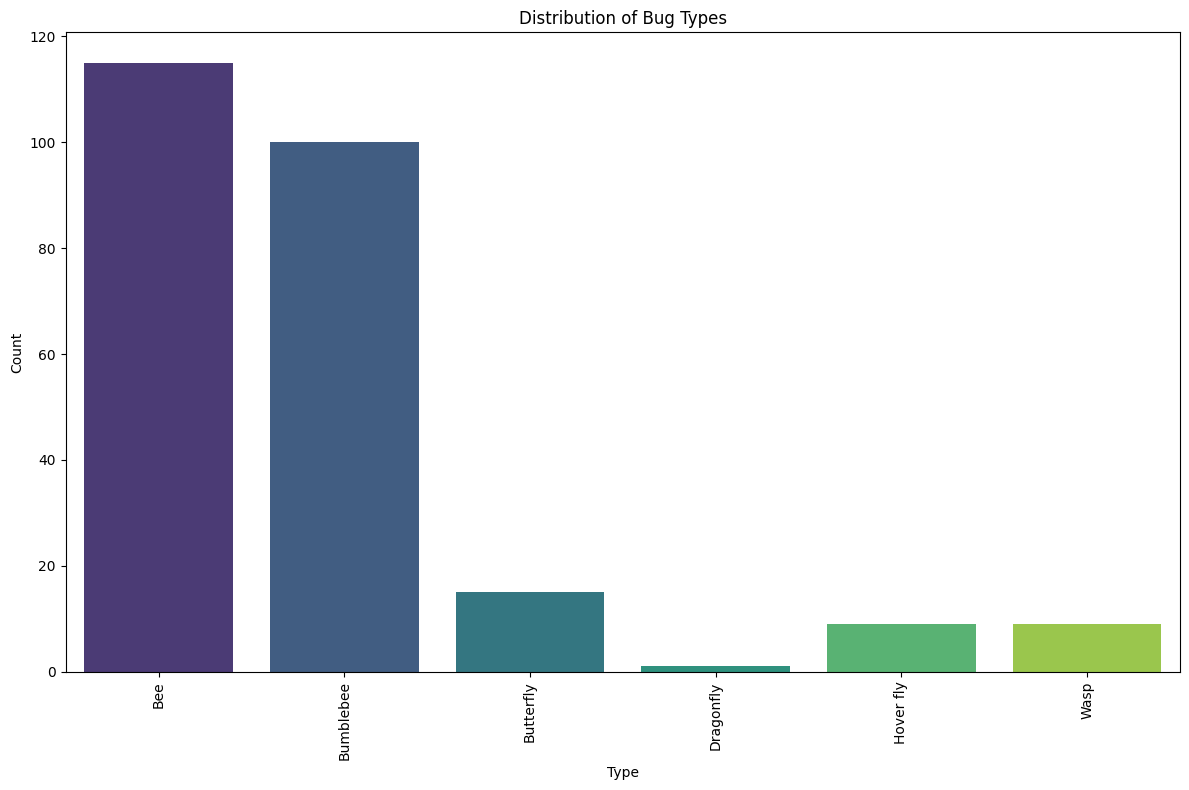

C:\Users\sophi\AppData\Local\Temp\ipykernel_34000\2284762290.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values,  palette="viridis")


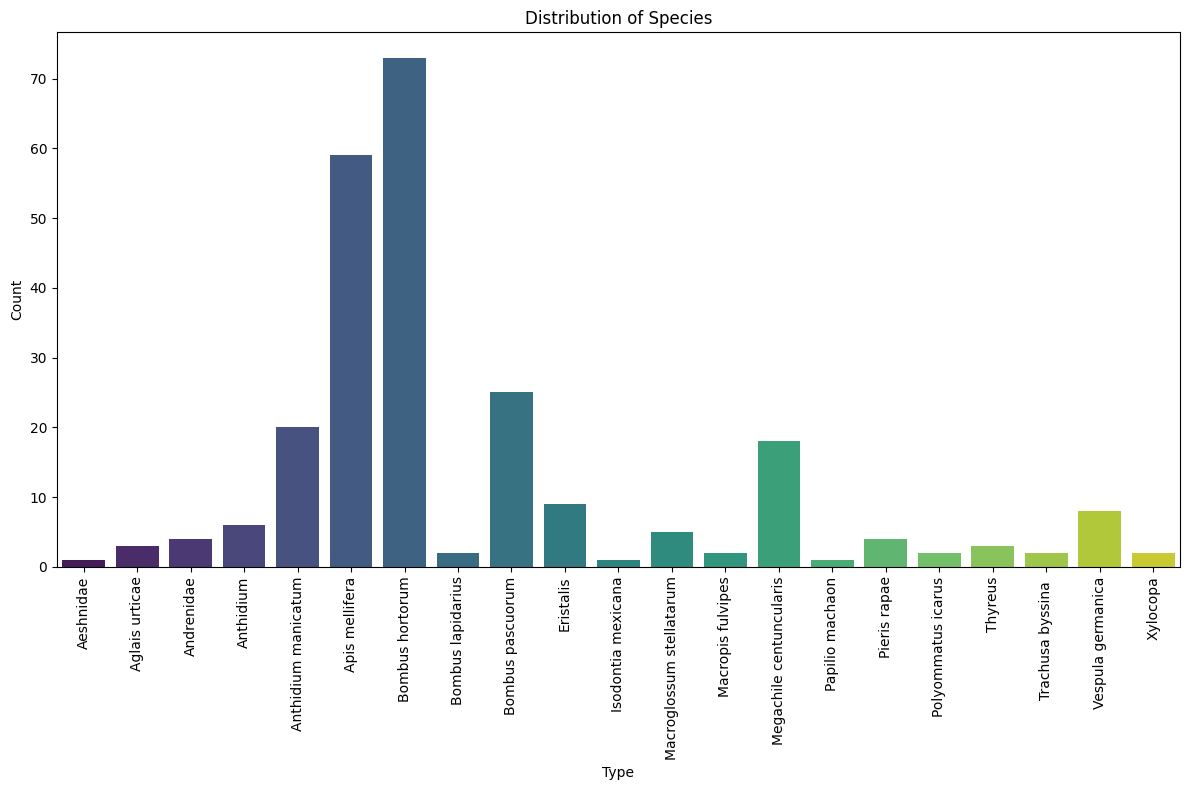

In [14]:
def plot_distribution(data, title):
    counts = data.sum()
    plt.figure(figsize=(12, 8))
    sns.barplot(x=counts.index, y=counts.values,  palette="viridis")
    plt.title(title)
    plt.xlabel('Type')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

plot_distribution(bug_type_df, 'Distribution of Bug Types')
plot_distribution(species_df, 'Distribution of Species')

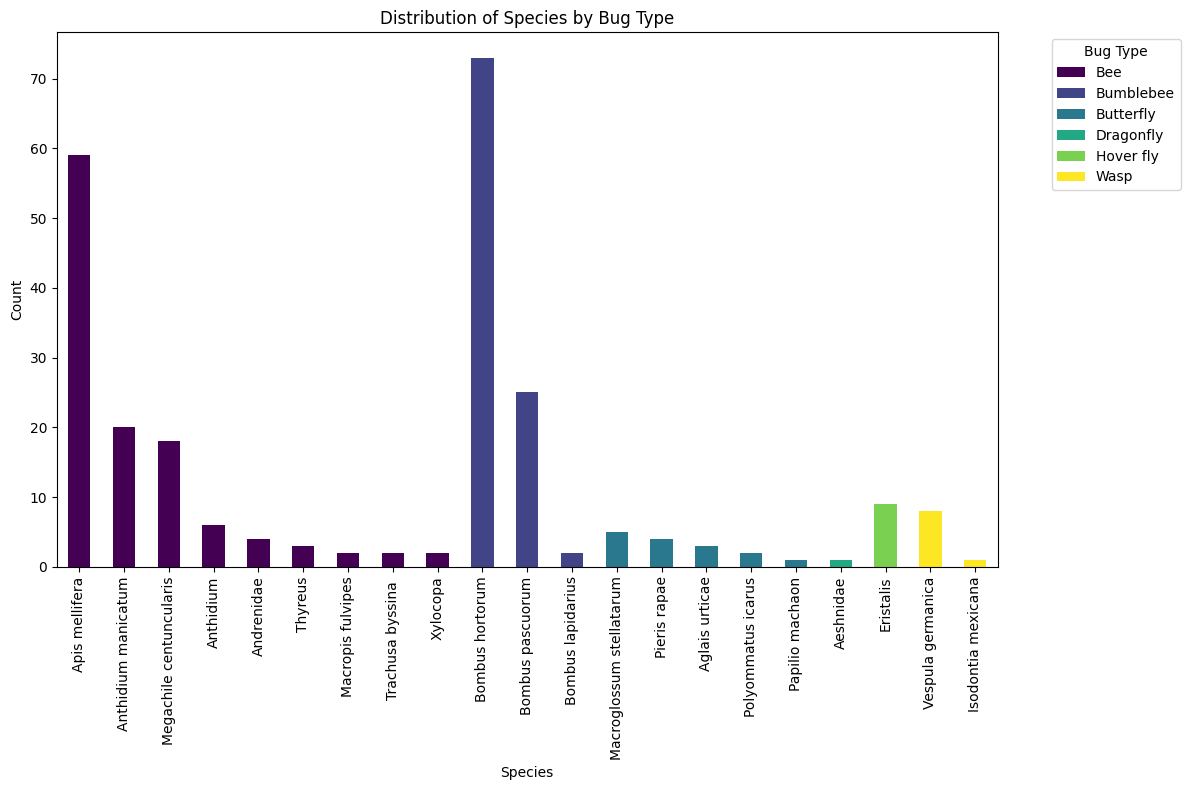

In [15]:
def plot_species_distribution_combined_sorted(bug_type_df, species_df):
    combined_df = pd.concat([bug_type_df, species_df], axis=1)
    bug_types = bug_type_df.columns
    species = species_df.columns
    
    species_distribution = pd.DataFrame(0, index=species, columns=bug_types)
    
    for bug_type in bug_types:
        species_distribution[bug_type] = combined_df[combined_df[bug_type] == 1][species].sum()
    
    species_distribution = species_distribution.sort_values(by=bug_types.tolist(), ascending=False)

    species_distribution.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
    plt.title('Distribution of Species by Bug Type')
    plt.xlabel('Species')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.legend(title='Bug Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Call the function to plot the combined distribution
plot_species_distribution_combined_sorted(bug_type_df, species_df)

In [16]:
print(classif_df)

      ID bug_type           species
0      1    [Bee]  [Apis mellifera]
1      2    [Bee]  [Apis mellifera]
2      3    [Bee]  [Apis mellifera]
3      4    [Bee]  [Apis mellifera]
4      5    [Bee]  [Apis mellifera]
..   ...      ...               ...
245  246    [Bee]  [Apis mellifera]
246  247    [Bee]  [Apis mellifera]
247  248    [Bee]  [Apis mellifera]
248  249    [Bee]  [Apis mellifera]
249  250    [Bee]  [Apis mellifera]

[249 rows x 3 columns]


In [31]:
def process_new_labels(df):
  bug_types = []
  species = []
  
  for _, row in df.iterrows():
    bugs = row['bug_type']
    species_info = row['species']
    
    # Keep only bee, bumblebee, or mark as 'other'
    if 'Bee' in bugs:
      new_bug_type = 'Bee'
    elif 'Bumblebee' in bugs:
      new_bug_type = 'Bumblebee'
    else:
      new_bug_type = 'Other'
    
    bug_types.append([new_bug_type])  # Convert to list for MultiLabelBinarizer
    species.append([species_info])  # Convert to list for MultiLabelBinarizer

  df['bug_type'] = bug_types
  #df['species'] = species
  return df

classif_df_copy = process_new_labels(classif_df.copy())

#Verification si le changement est fait
r = classif_df_copy.iloc[232]
print(r)

print(classif_df_copy)


ID                                 234
bug_type                       [Other]
species     [Macroglossum stellatarum]
Name: 233, dtype: object
      ID bug_type           species
0      1    [Bee]  [Apis mellifera]
1      2    [Bee]  [Apis mellifera]
2      3    [Bee]  [Apis mellifera]
3      4    [Bee]  [Apis mellifera]
4      5    [Bee]  [Apis mellifera]
..   ...      ...               ...
245  246    [Bee]  [Apis mellifera]
246  247    [Bee]  [Apis mellifera]
247  248    [Bee]  [Apis mellifera]
248  249    [Bee]  [Apis mellifera]
249  250    [Bee]  [Apis mellifera]

[249 rows x 3 columns]


C:\Users\sophi\AppData\Local\Temp\ipykernel_34000\2284762290.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values,  palette="viridis")


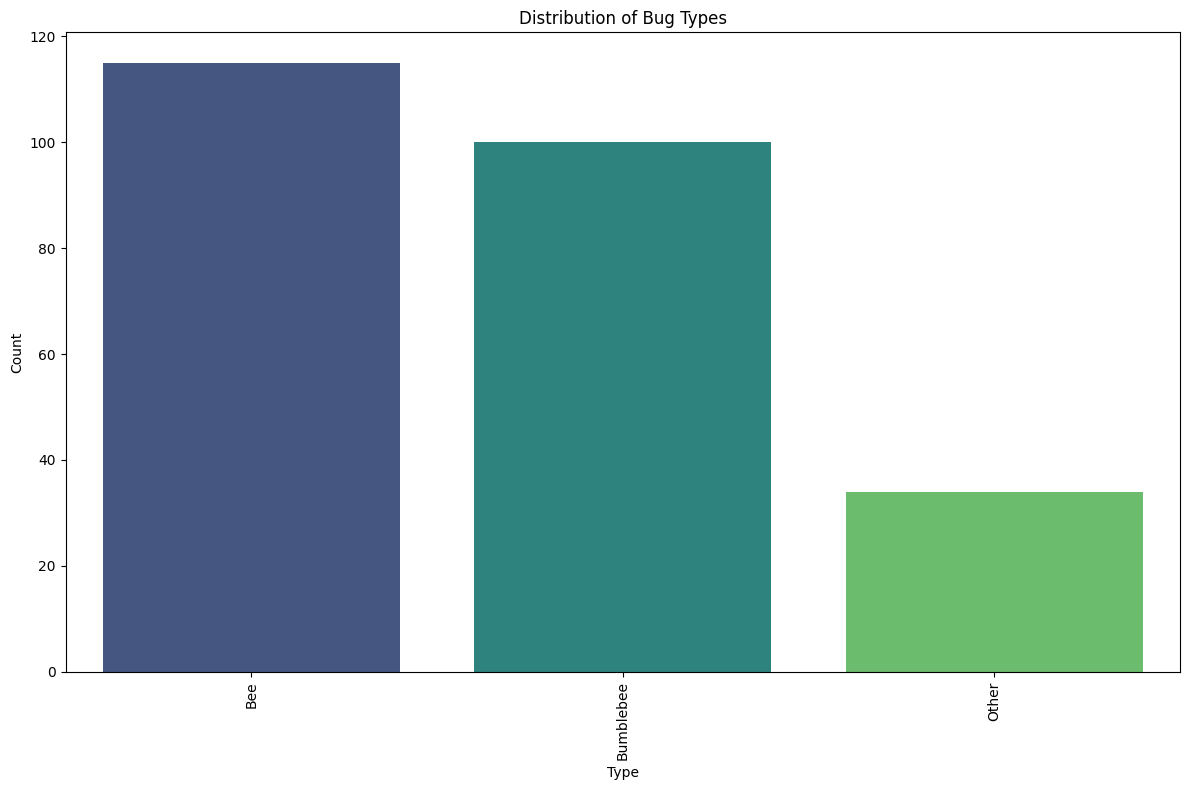

In [33]:
mlb_bug_type = MultiLabelBinarizer()
mlb_species = MultiLabelBinarizer()

bug_type_encoded = mlb_bug_type.fit_transform(classif_df_copy['bug_type'])
species_encoded = mlb_species.fit_transform(classif_df_copy['species'])

# 转换为DataFrame
bug_type_df = pd.DataFrame(bug_type_encoded, columns=mlb_bug_type.classes_)
species_df = pd.DataFrame(species_encoded, columns=mlb_species.classes_)

# 合并所有数据
all_data_df = pd.concat([classif_df.drop(columns=['bug_type', 'species']), bug_type_df, species_df, features_df], axis=1)

plot_distribution(bug_type_df, 'Distribution of Bug Types')


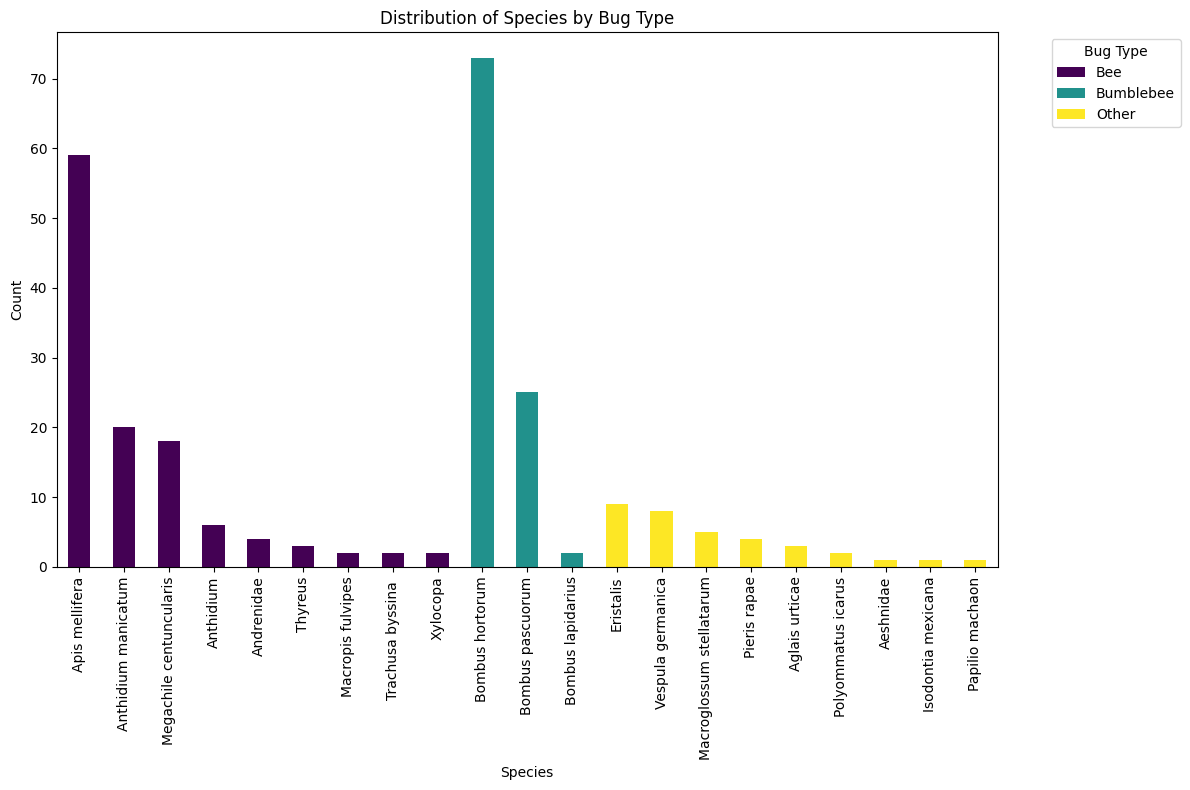

In [34]:
plot_species_distribution_combined_sorted(bug_type_df, species_df)

Unique classes: ['Bee' 'Bumblebee' 'Other']
PCA transformed shape: (249, 2)
digit_class_np shape: (249,)
Class Bee: 115 instances
Class Bumblebee: 100 instances
Class Other: 34 instances


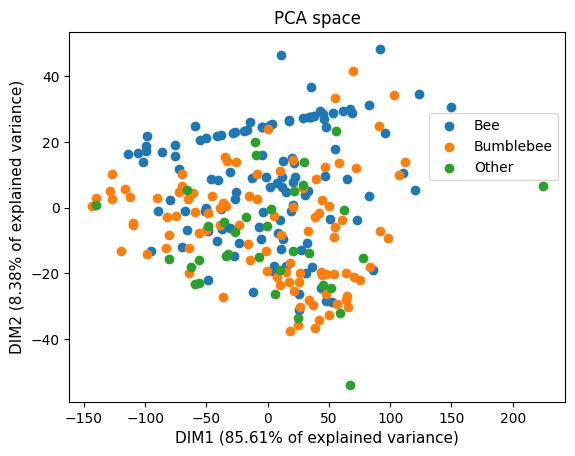

In [42]:
# Ensure that digit_class contains strings instead of lists
digit_class = classif_df_copy["bug_type"].apply(lambda x: x[0] if isinstance(x, list) else x)
dig_list = np.unique(digit_class.values)
print("Unique classes:", dig_list)

features = features_df

pca = PCA(n_components=2)
digits_pca = pca.fit_transform(features)
print("PCA transformed shape:", digits_pca.shape)

pc1 = round(pca.explained_variance_ratio_[0] * 100, 2)
pc2 = round(pca.explained_variance_ratio_[1] * 100, 2)

fig, ax = plt.subplots()

digit_class_np = digit_class.values  # Convert to numpy array for correct boolean indexing
print("digit_class_np shape:", digit_class_np.shape)

for dig in dig_list:
    mask = digit_class_np == dig
    print(f"Class {dig}: {np.sum(mask)} instances")
    ax.scatter(digits_pca[mask, 0], digits_pca[mask, 1], label=dig)

ax.set_xlabel("DIM1 ({0}% of explained variance)".format(pc1), fontsize=11)
ax.set_ylabel("DIM2 ({0}% of explained variance)".format(pc2), fontsize=11)
ax.legend(bbox_to_anchor=(1, 0.8))
ax.set_title('PCA space', fontsize=12)

plt.show()

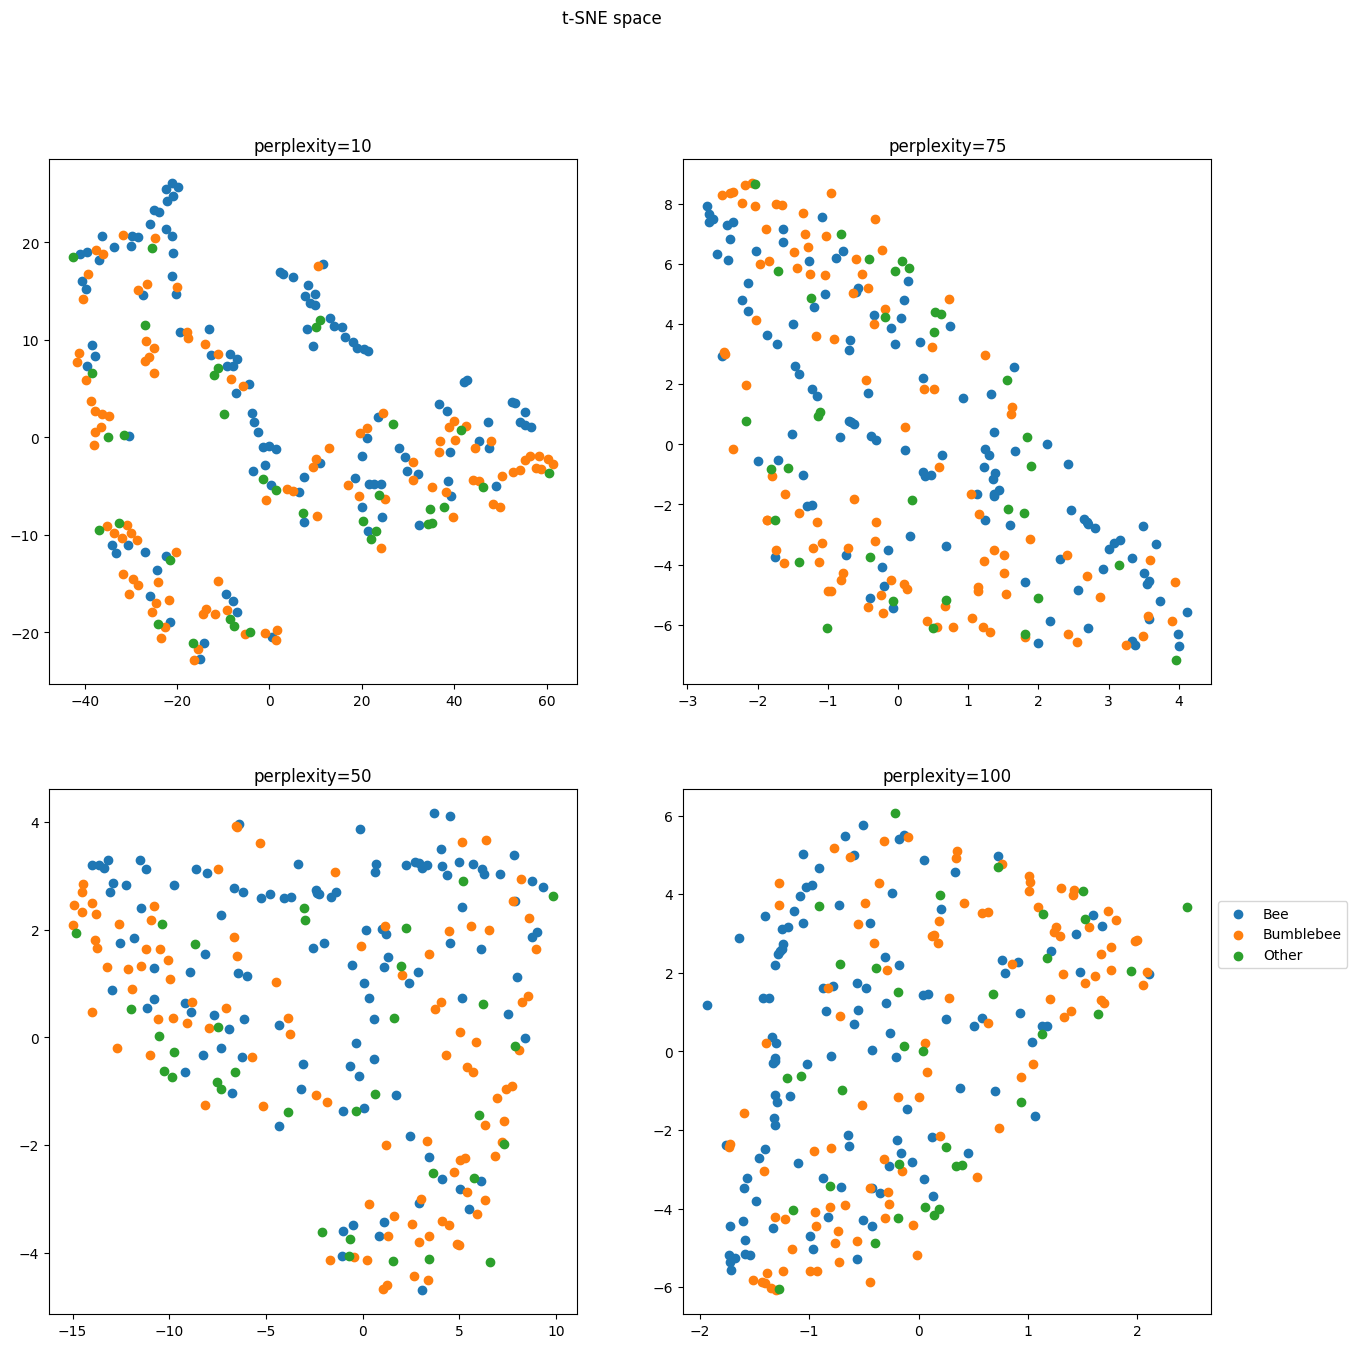

In [43]:
#TSNE
from sklearn.manifold import LocallyLinearEmbedding, MDS, Isomap, TSNE

nb_lines = 2
nb_cols = 2

fig, ax = plt.subplots(nb_lines, nb_cols, figsize=(15, 15))
line_ids, col_ids = np.meshgrid(range(0, nb_lines), 
                                range(0, nb_cols))
fig.suptitle('t-SNE space', fontsize=12)
for perp, line_id, col_id in zip([10,50,75,100],
                                      line_ids.flatten(), col_ids.flatten()):
   model = TSNE(n_components=2,perplexity=perp, random_state=0)
   digits_tsne = model.fit_transform(features)
   for dig in dig_list:
         ax[line_id, col_id].scatter(digits_tsne[digit_class==dig, 0], digits_tsne[digit_class==dig, 1],label=dig);    
   
   ax[line_id, col_id].set_title("perplexity={0}".format(perp))
plt.legend(bbox_to_anchor=(1, 0.8));  

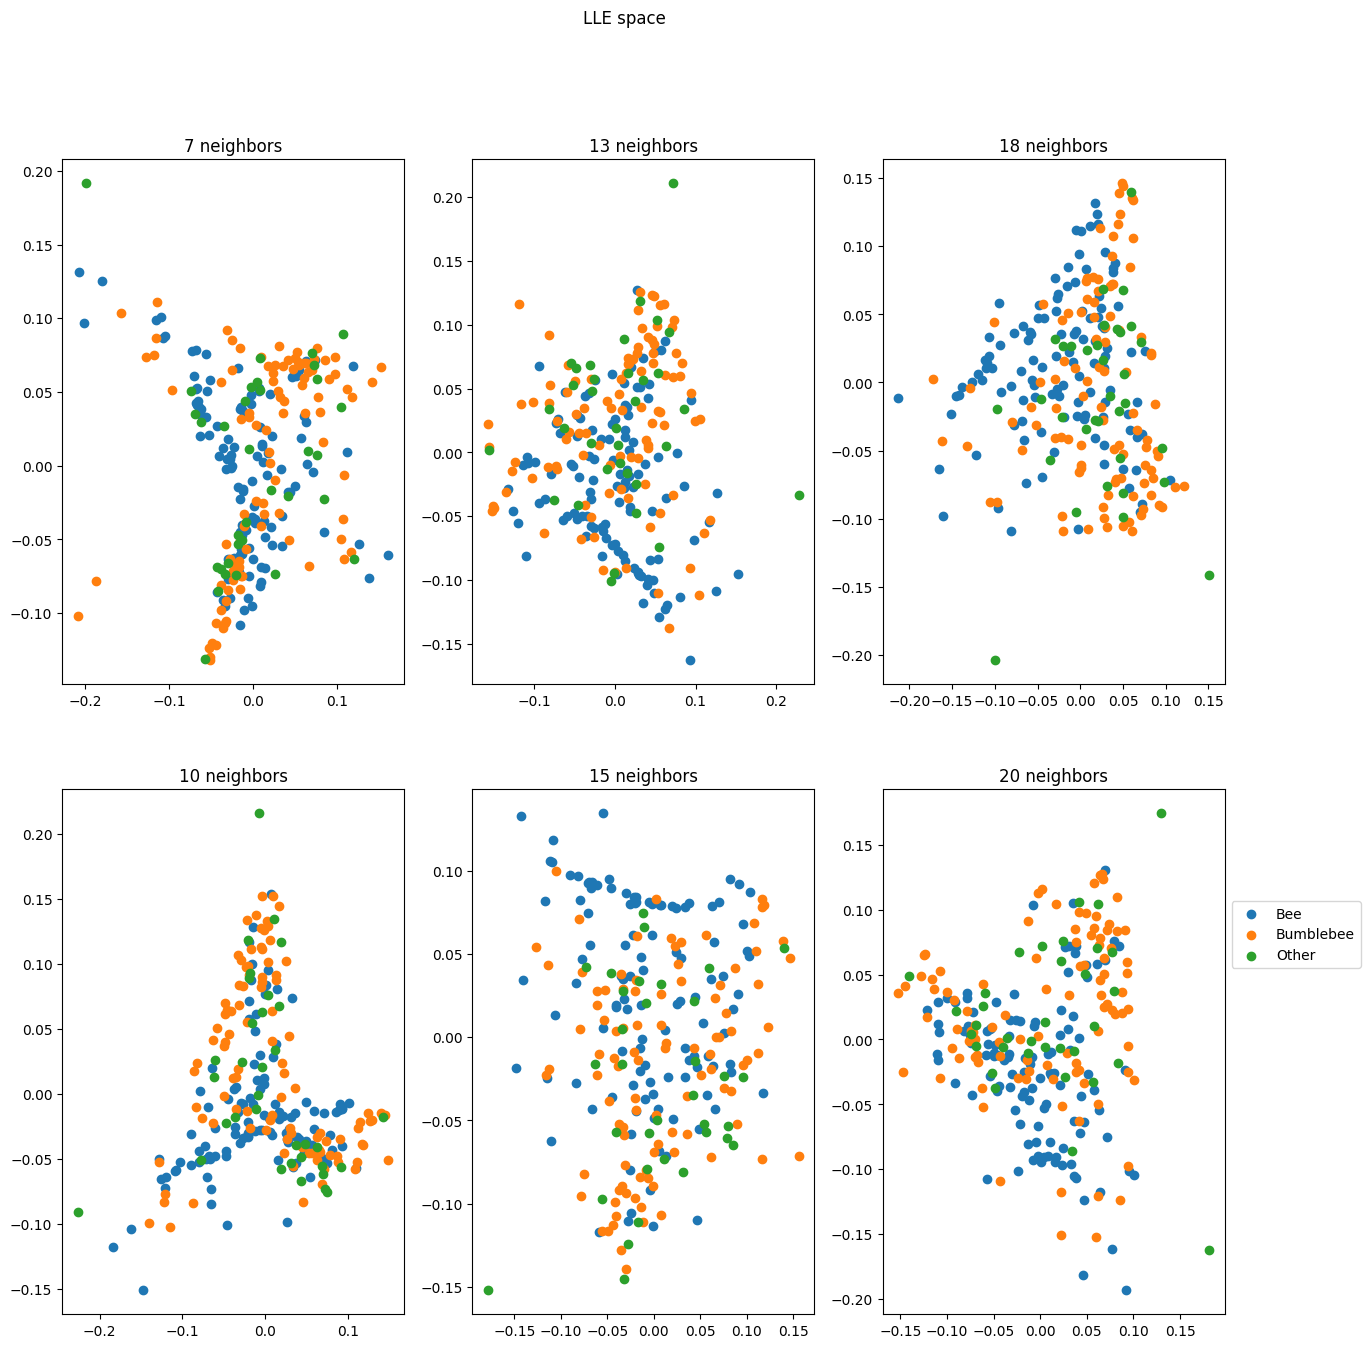

In [44]:
nb_lines = 2
nb_cols = 3

fig, ax = plt.subplots(nb_lines, nb_cols, figsize=(15, 15))
line_ids, col_ids = np.meshgrid(range(0, nb_lines), 
                                range(0, nb_cols))
fig.suptitle('LLE space', fontsize=12)
for n_neighbor, line_id, col_id in zip([7, 10, 13, 15, 18, 20],
                                      line_ids.flatten(), col_ids.flatten()):
   model = LocallyLinearEmbedding(n_neighbors=n_neighbor, random_state=0)
   digits_lle = model.fit_transform(features)
   for dig in dig_list:
         ax[line_id, col_id].scatter(digits_lle[digit_class==dig, 0], digits_lle[digit_class==dig, 1],label=dig);    
   
   ax[line_id, col_id].set_title("{0} neighbors".format(n_neighbor))
plt.legend(bbox_to_anchor=(1, 0.8));   

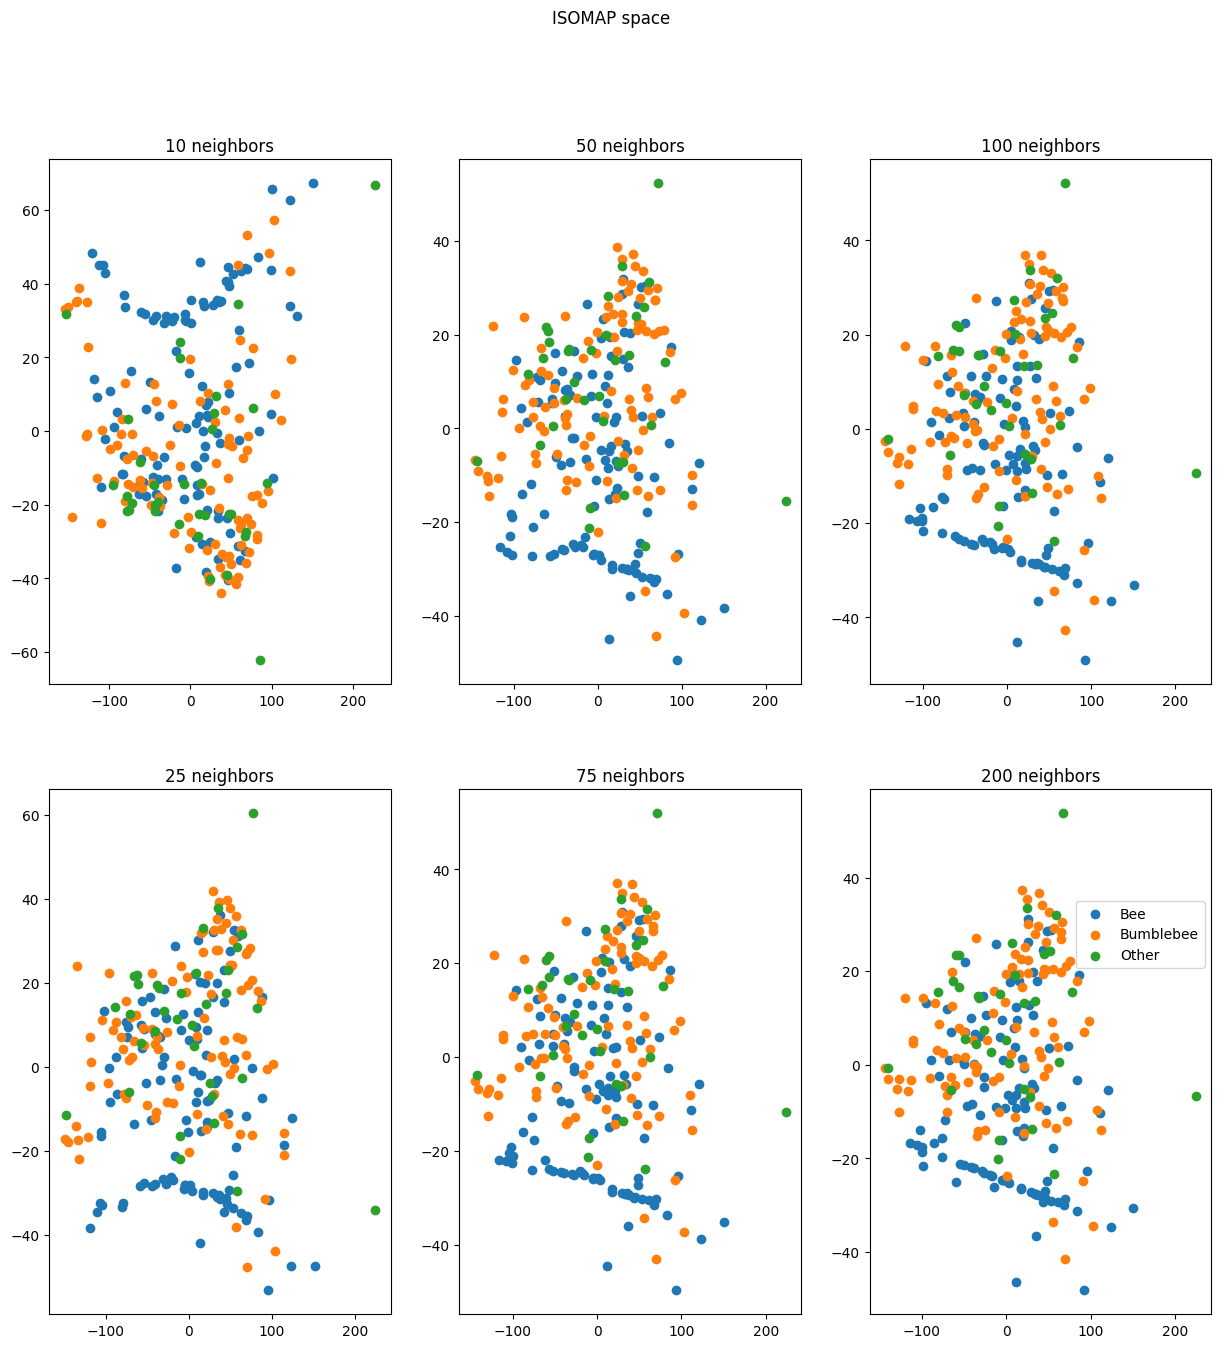

In [45]:
nb_lines = 2
nb_cols = 3

fig, ax = plt.subplots(nb_lines, nb_cols, figsize=(15, 15))
line_ids, col_ids = np.meshgrid(range(0, nb_lines), 
                                range(0, nb_cols))
fig.suptitle('ISOMAP space', fontsize=12)
for n_neighbor, line_id, col_id in zip([10, 25, 50, 75, 100, 200],
                                      line_ids.flatten(), col_ids.flatten()):
   model = Isomap(n_neighbors=n_neighbor)
   digits_lle = model.fit_transform(features)
   for dig in dig_list:
         ax[line_id, col_id].scatter(digits_lle[digit_class==dig, 0], digits_lle[digit_class==dig, 1],label=dig);    
   
   ax[line_id, col_id].set_title("{0} neighbors".format(n_neighbor))
plt.legend(bbox_to_anchor=(1, 0.8));   

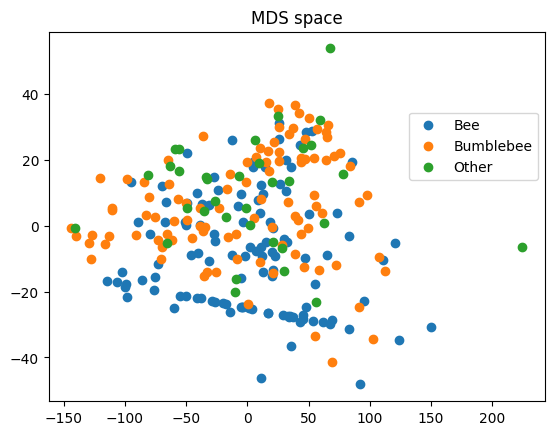

In [46]:
mds = MDS(random_state=0)
digits_mds = model.fit_transform(features)

fig, ax = plt.subplots();
for dig in dig_list:
     ax.scatter(digits_lle[digit_class==dig, 0], digits_lle[digit_class==dig, 1],label=dig); 
ax.legend(bbox_to_anchor=(1, 0.8));    
ax.set_title('MDS space', fontsize=12);   